<a href="https://colab.research.google.com/github/gus-s-ramos/AlgoritmoAtividadeFinal/blob/main/pratica/Atv04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4 — Crossover em Algoritmos Genéticos

## Introdução


O **crossover** (ou recombinação genética) é o principal mecanismo de **exploração** nos Algoritmos Genéticos (AGs).

Ele combina características de dois pais para gerar filhos que podem apresentar desempenho superior.

Nesta aula, estudaremos os principais tipos:
 - Crossover de 1 ponto
 - Crossover de 2 pontos
 - Crossover uniforme
 - Crossover aritmético

Cada tipo tem vantagens dependendo da representação (binária, inteira ou real) e do tipo de problema (discreto ou contínuo).


In [ ]:


import random
import numpy as np

# ==============================================
# Exemplo prático: comparação dos tipos de crossover
# ==============================================

def crossover_1ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1)-1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_2pontos(pai1, pai2):
    p1, p2 = sorted(random.sample(range(1, len(pai1)-1), 2))
    filho1 = pai1[:p1] + pai2[p1:p2] + pai1[p2:]
    filho2 = pai2[:p1] + pai1[p1:p2] + pai2[p2:]
    return filho1, filho2

def crossover_uniforme(pai1, pai2, taxa=0.5):
    filho1, filho2 = [], []
    for g1, g2 in zip(pai1, pai2):
        if random.random() < taxa:
            filho1.append(g1)
            filho2.append(g2)
        else:
            filho1.append(g2)
            filho2.append(g1)
    return filho1, filho2

def crossover_aritmetico(pai1, pai2, alpha=0.5):
    filho1 = [alpha * x + (1 - alpha) * y for x, y in zip(pai1, pai2)]
    filho2 = [(1 - alpha) * x + alpha * y for x, y in zip(pai1, pai2)]
    return filho1, filho2




In [ ]:
# ==============================================
# Demonstração com exemplos
# ==============================================

pai1_bin = [1, 1, 0, 0, 1, 0, 0]
pai2_bin = [0, 0, 1, 1, 0, 1, 1]

pai1_real = [2.0, 4.0]
pai2_real = [6.0, 8.0]

print("=== Crossover de 1 ponto ===")
print(*crossover_1ponto(pai1_bin, pai2_bin))

print("\n=== Crossover de 2 pontos ===")
print(*crossover_2pontos(pai1_bin, pai2_bin))

print("\n=== Crossover uniforme ===")
print(*crossover_uniforme(pai1_bin, pai2_bin))

print("\n=== Crossover aritmético ===")
print(*crossover_aritmetico(pai1_real, pai2_real))

=== Crossover de 1 ponto ===
[1, 1, 1, 1, 0, 1, 1] [0, 0, 0, 0, 1, 0, 0]

=== Crossover de 2 pontos ===
[1, 1, 0, 1, 1, 0, 0] [0, 0, 1, 0, 0, 1, 1]

=== Crossover uniforme ===
[0, 1, 0, 0, 1, 1, 0] [1, 0, 1, 1, 0, 0, 1]

=== Crossover aritmético ===
[4.0, 6.0] [4.0, 6.0]


# Exercícios

1. **Implementação básica:**  
   Implemente novamente o crossover de 1 ponto, mas mostre graficamente (usando `matplotlib`) onde ocorreu o ponto de corte.

2. **Variação:**  
   Modifique o código do crossover de 2 pontos para permitir que o número de cortes seja configurável (`n_cortes`).

3. **Probabilidade de crossover:**  
   Implemente um código que só realize o crossover com probabilidade `Pc = 0.8`.  
   Caso contrário, os filhos são cópias dos pais.

4. **Exploração de diversidade:**  
   Gere uma população de 10 indivíduos binários de tamanho 8 e aplique crossover uniforme entre pares.  
   Compare a diversidade antes e depois do crossover.

5. **Crossover aritmético com α aleatório:**  
   Gere filhos com valores de α variando entre 0 e 1 a cada execução.  
   Observe como os valores dos filhos mudam.

6. **Visualização:**  
   Faça um gráfico mostrando a influência de diferentes valores de α (0.1, 0.5, 0.9) sobre os filhos no crossover aritmético.

7. **Comparativo:**  
   Gere 100 pares de pais aleatórios e aplique os 3 tipos de crossover binário (1 ponto, 2 pontos, uniforme).  
   Conte a média de genes diferentes entre pais e filhos.  
   Qual método gerou maior diversidade?

8. **Crossover e desempenho:**  
   Aplique um pequeno AG (população de 20, 30 gerações) com função fitness `f(x) = -(x-5)**2 + 25`.  
   Compare os resultados com `Pc = 0.5`, `0.7` e `0.9`.

9. **Crossover híbrido:**  
   Crie um crossover que misture o tipo de corte (1 ponto ou uniforme) de forma probabilística.  
   Exemplo: 60% de chance de ser 1 ponto, 40% uniforme.

10. **Discussão conceitual:**  
   Explique, em texto, em quais cenários o crossover de 2 pontos é preferível ao uniforme.  
   Dê um exemplo de problema real onde essa escolha faria diferença.


### Exercício 1: Crossover de 1 ponto com visualização


Pais: [1, 1, 0, 0, 1, 0, 0, 1] e [0, 0, 1, 1, 0, 1, 1, 0]
Ponto de corte: 1
Filhos: [1, 0, 1, 1, 0, 1, 1, 0] e [0, 1, 0, 0, 1, 0, 0, 1]


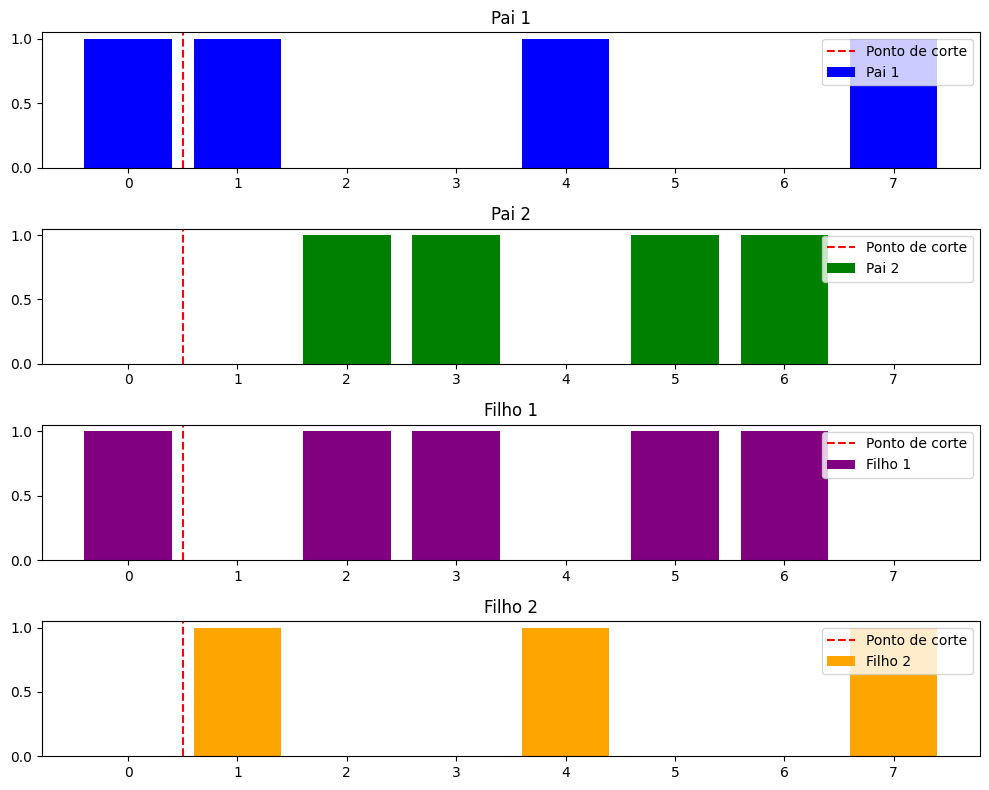

In [2]:
import matplotlib.pyplot as plt
import random

def crossover_1ponto_visual(pai1, pai2):
    ponto = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]

    print(f"Pais: {pai1} e {pai2}")
    print(f"Ponto de corte: {ponto}")
    print(f"Filhos: {filho1} e {filho2}")

    # Visualização
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

    ax1.bar(range(len(pai1)), pai1, color='blue', label='Pai 1')
    ax1.axvline(x=ponto - 0.5, color='red', linestyle='--', label='Ponto de corte')
    ax1.set_title('Pai 1')
    ax1.legend()

    ax2.bar(range(len(pai2)), pai2, color='green', label='Pai 2')
    ax2.axvline(x=ponto - 0.5, color='red', linestyle='--', label='Ponto de corte')
    ax2.set_title('Pai 2')
    ax2.legend()

    ax3.bar(range(len(filho1)), filho1, color='purple', label='Filho 1')
    ax3.axvline(x=ponto - 0.5, color='red', linestyle='--', label='Ponto de corte')
    ax3.set_title('Filho 1')
    ax3.legend()

    ax4.bar(range(len(filho2)), filho2, color='orange', label='Filho 2')
    ax4.axvline(x=ponto - 0.5, color='red', linestyle='--', label='Ponto de corte')
    ax4.set_title('Filho 2')
    ax4.legend()

    plt.tight_layout()
    plt.show()

# Exemplo de uso
pai1_ex = [1, 1, 0, 0, 1, 0, 0, 1]
pai2_ex = [0, 0, 1, 1, 0, 1, 1, 0]
crossover_1ponto_visual(pai1_ex, pai2_ex)


### Exercício 2: Crossover de 2 pontos configurável (n_cortes)


In [3]:
import random

def crossover_n_pontos(pai1, pai2, n_cortes):
    if n_cortes <= 0:
        return pai1[:], pai2[:]
    if n_cortes >= len(pai1) - 1:
        n_cortes = len(pai1) - 1

    pontos = sorted(random.sample(range(1, len(pai1)), n_cortes))

    filho1 = []
    filho2 = []
    current_pai = 1
    last_cut = 0

    for i, ponto in enumerate(pontos):
        if current_pai == 1:
            filho1.extend(pai1[last_cut:ponto])
            filho2.extend(pai2[last_cut:ponto])
        else:
            filho1.extend(pai2[last_cut:ponto])
            filho2.extend(pai1[last_cut:ponto])
        current_pai = 3 - current_pai
        last_cut = ponto


    if current_pai == 1:
        filho1.extend(pai1[last_cut:])
        filho2.extend(pai2[last_cut:])
    else:
        filho1.extend(pai2[last_cut:])
        filho2.extend(pai1[last_cut:])

    return filho1, filho2

pai1_bin = [1, 1, 0, 0, 1, 0, 0, 1]
pai2_bin = [0, 0, 1, 1, 0, 1, 1, 0]

print("=== Crossover com 1 ponto ===")
filho1_1p, filho2_1p = crossover_n_pontos(pai1_bin, pai2_bin, 1)
print(f"Pais: {pai1_bin}, {pai2_bin}")
print(f"Filhos: {filho1_1p}, {filho2_1p}")

print("\n=== Crossover com 2 pontos ===")
filho1_2p, filho2_2p = crossover_n_pontos(pai1_bin, pai2_bin, 2)
print(f"Pais: {pai1_bin}, {pai2_bin}")
print(f"Filhos: {filho1_2p}, {filho2_2p}")

print("\n=== Crossover com 3 pontos ===")
filho1_3p, filho2_3p = crossover_n_pontos(pai1_bin, pai2_bin, 3)
print(f"Pais: {pai1_bin}, {pai2_bin}")
print(f"Filhos: {filho1_3p}, {filho2_3p}")

print("\n=== Crossover com 5 pontos ===")
filho1_5p, filho2_5p = crossover_n_pontos(pai1_bin, pai2_bin, 5)
print(f"Pais: {pai1_bin}, {pai2_bin}")
print(f"Filhos: {filho1_5p}, {filho2_5p}")


=== Crossover com 1 ponto ===
Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]
Filhos: [1, 1, 0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0, 0, 1]

=== Crossover com 2 pontos ===
Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]
Filhos: [1, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1, 0, 0]

=== Crossover com 3 pontos ===
Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]
Filhos: [1, 1, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]

=== Crossover com 5 pontos ===
Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]
Filhos: [1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1]


### Exercício 3: Probabilidade de Crossover


In [4]:
import random

def crossover_com_probabilidade(pai1, pai2, pc, crossover_func):
    if random.random() < pc:
        filho1, filho2 = crossover_func(pai1, pai2)
    else:
        filho1, filho2 = list(pai1), list(pai2)
    return filho1, filho2

def crossover_1ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1)-1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

pai1_bin = [1, 1, 0, 0, 1, 0, 0, 1]
pai2_bin = [0, 0, 1, 1, 0, 1, 1, 0]

pc = 0.8

print(f"Pais: {pai1_bin}, {pai2_bin}")
print(f"Probabilidade de Crossover (Pc): {pc}")

for i in range(5):
    filho1, filho2 = crossover_com_probabilidade(pai1_bin, pai2_bin, pc, crossover_1ponto)
    print(f"Tentativa {i+1}: Filho1={filho1}, Filho2={filho2}")
    if filho1 == pai1_bin and filho2 == pai2_bin:
        print("    -> Crossover não ocorreu, filhos são cópias dos pais.")
    else:
        print("    -> Crossover ocorreu.")


Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]
Probabilidade de Crossover (Pc): 0.8
Tentativa 1: Filho1=[1, 1, 0, 0, 1, 0, 0, 0], Filho2=[0, 0, 1, 1, 0, 1, 1, 1]
    -> Crossover ocorreu.
Tentativa 2: Filho1=[1, 1, 0, 1, 0, 1, 1, 0], Filho2=[0, 0, 1, 0, 1, 0, 0, 1]
    -> Crossover ocorreu.
Tentativa 3: Filho1=[1, 1, 0, 0, 1, 0, 0, 1], Filho2=[0, 0, 1, 1, 0, 1, 1, 0]
    -> Crossover não ocorreu, filhos são cópias dos pais.
Tentativa 4: Filho1=[1, 1, 0, 0, 1, 0, 0, 0], Filho2=[0, 0, 1, 1, 0, 1, 1, 1]
    -> Crossover ocorreu.
Tentativa 5: Filho1=[1, 1, 0, 0, 0, 1, 1, 0], Filho2=[0, 0, 1, 1, 1, 0, 0, 1]
    -> Crossover ocorreu.


### Exercício 4: Exploração de diversidade


In [5]:
import random
import numpy as np

def crossover_uniforme(pai1, pai2, taxa=0.5):
    filho1, filho2 = [], []
    for g1, g2 in zip(pai1, pai2):
        if random.random() < taxa:
            filho1.append(g1)
            filho2.append(g2)
        else:
            filho1.append(g2)
            filho2.append(g1)
    return filho1, filho2

def gerar_populacao_binaria(tamanho_populacao, tamanho_individuo):
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = [random.randint(0, 1) for _ in range(tamanho_individuo)]
        populacao.append(individuo)
    return populacao

def calcular_diversidade(populacao):
    unique_individuals = set(tuple(ind) for ind in populacao)
    return len(unique_individuals) / len(populacao)

tamanho_populacao = 10
tamanho_individuo = 8

populacao_inicial = gerar_populacao_binaria(tamanho_populacao, tamanho_individuo)
print("População inicial:")
for i, ind in enumerate(populacao_inicial):
    print(f"  Indivíduo {i+1}: {ind}")

diversidade_antes = calcular_diversidade(populacao_inicial)
print(f"\nDiversidade antes do crossover: {diversidade_antes:.2f}")

populacao_apos_crossover = []
if len(populacao_inicial) % 2 != 0:
    populacao_inicial.pop()

random.shuffle(populacao_inicial)

for i in range(0, len(populacao_inicial), 2):
    pai1 = populacao_inicial[i]
    pai2 = populacao_inicial[i+1]

    filho1, filho2 = crossover_uniforme(pai1, pai2)
    populacao_apos_crossover.append(filho1)
    populacao_apos_crossover.append(filho2)

print("\nPopulação após crossover:")
for i, ind in enumerate(populacao_apos_crossover):
    print(f"  Indivíduo {i+1}: {ind}")

diversidade_depois = calcular_diversidade(populacao_apos_crossover)
print(f"\nDiversidade após o crossover: {diversidade_depois:.2f}")

if diversidade_depois > diversidade_antes:
    print("O crossover aumentou a diversidade da população.")
elif diversidade_depois < diversidade_antes:
    print("O crossover diminuiu a diversidade da população.")
else:
    print("O crossover manteve o mesmo nível de diversidade da população.")


População inicial:
  Indivíduo 1: [0, 1, 0, 0, 0, 1, 1, 1]
  Indivíduo 2: [1, 0, 0, 1, 1, 0, 0, 1]
  Indivíduo 3: [0, 0, 0, 0, 1, 1, 1, 0]
  Indivíduo 4: [0, 1, 0, 1, 0, 0, 0, 1]
  Indivíduo 5: [0, 0, 1, 0, 0, 0, 0, 0]
  Indivíduo 6: [0, 0, 0, 1, 0, 1, 0, 0]
  Indivíduo 7: [1, 0, 1, 0, 1, 1, 1, 1]
  Indivíduo 8: [0, 0, 1, 0, 1, 1, 0, 0]
  Indivíduo 9: [1, 1, 1, 1, 0, 0, 0, 0]
  Indivíduo 10: [1, 0, 0, 0, 1, 1, 0, 1]

Diversidade antes do crossover: 1.00

População após crossover:
  Indivíduo 1: [1, 1, 1, 0, 0, 1, 1, 1]
  Indivíduo 2: [0, 1, 0, 1, 0, 0, 0, 0]
  Indivíduo 3: [1, 0, 1, 0, 1, 1, 0, 1]
  Indivíduo 4: [1, 0, 0, 0, 1, 1, 1, 1]
  Indivíduo 5: [0, 0, 1, 1, 0, 1, 0, 0]
  Indivíduo 6: [0, 0, 0, 0, 1, 1, 0, 0]
  Indivíduo 7: [0, 0, 0, 1, 1, 0, 0, 1]
  Indivíduo 8: [1, 1, 0, 1, 0, 0, 0, 1]
  Indivíduo 9: [0, 0, 1, 0, 0, 0, 0, 0]
  Indivíduo 10: [0, 0, 0, 0, 1, 1, 1, 0]

Diversidade após o crossover: 1.00
O crossover manteve o mesmo nível de diversidade da população.


### Exercício 5: Crossover aritmético com α aleatório


In [6]:
import random

def crossover_aritmetico(pai1, pai2, alpha=0.5):
    filho1 = [alpha * x + (1 - alpha) * y for x, y in zip(pai1, pai2)]
    filho2 = [(1 - alpha) * x + alpha * y for x, y in zip(pai1, pai2)]
    return filho1, filho2

pai1_real = [10.0, 20.0, 30.0]
pai2_real = [50.0, 40.0, 10.0]

print(f"Pais: {pai1_real}, {pai2_real}")

print("\n--- Gerando filhos com \u03b1 aleatório ---")
for i in range(5):
    alpha_aleatorio = random.uniform(0, 1)
    filho1, filho2 = crossover_aritmetico(pai1_real, pai2_real, alpha=alpha_aleatorio)
    print(f"Tentativa {i+1}: \u03b1 = {alpha_aleatorio:.2f}, Filho1={filho1}, Filho2={filho2}")


Pais: [10.0, 20.0, 30.0], [50.0, 40.0, 10.0]

--- Gerando filhos com α aleatório ---
Tentativa 1: α = 0.56, Filho1=[27.726483445088416, 28.86324172254421, 21.136758277455794], Filho2=[32.27351655491158, 31.13675827745579, 18.86324172254421]
Tentativa 2: α = 0.22, Filho1=[41.382589103746405, 35.6912945518732, 14.3087054481268], Filho2=[18.6174108962536, 24.3087054481268, 25.691294551873202]
Tentativa 3: α = 0.76, Filho1=[19.4500406642759, 24.72502033213795, 25.274979667862052], Filho2=[40.5499593357241, 35.27497966786205, 14.725020332137952]
Tentativa 4: α = 0.43, Filho1=[32.6550681568461, 31.32753407842305, 18.67246592157695], Filho2=[27.3449318431539, 28.67246592157695, 21.32753407842305]
Tentativa 5: α = 0.16, Filho1=[43.47578263810222, 36.73789131905111, 13.262108680948888], Filho2=[16.52421736189778, 23.262108680948888, 26.737891319051112]


### Exercício 6: Visualização da influência de α


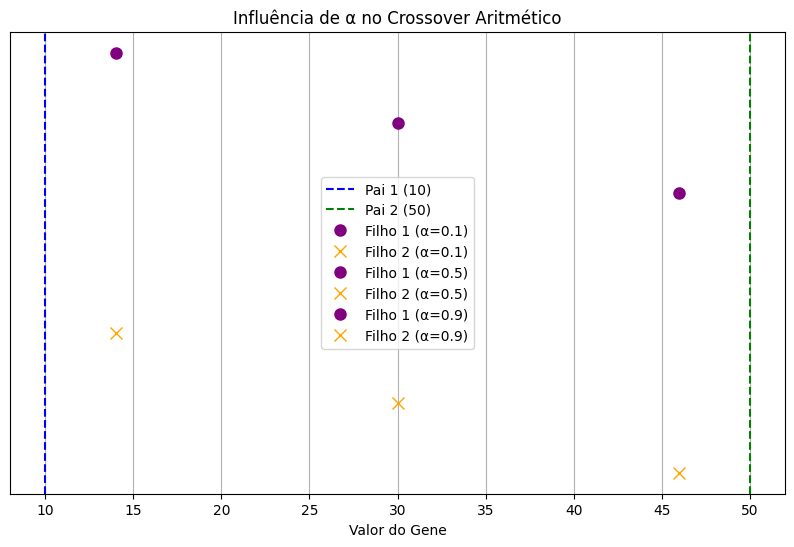

Valores gerados para os filhos:
α = 0.1: Filho1 = 46.00, Filho2 = 14.00
α = 0.5: Filho1 = 30.00, Filho2 = 30.00
α = 0.9: Filho1 = 14.00, Filho2 = 46.00


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def crossover_aritmetico(pai1, pai2, alpha=0.5):
    filho1 = [alpha * x + (1 - alpha) * y for x, y in zip(pai1, pai2)]
    filho2 = [(1 - alpha) * x + alpha * y for x, y in zip(pai1, pai2)]
    return filho1, filho2

pai1_val = 10
pai2_val = 50

alphas = [0.1, 0.5, 0.9]
filhos1 = []
filhos2 = []

for alpha in alphas:
    f1, f2 = crossover_aritmetico([pai1_val], [pai2_val], alpha=alpha)
    filhos1.append(f1[0])
    filhos2.append(f2[0])

plt.figure(figsize=(10, 6))

plt.axvline(x=pai1_val, color='blue', linestyle='--', label=f'Pai 1 ({pai1_val})')
plt.axvline(x=pai2_val, color='green', linestyle='--', label=f'Pai 2 ({pai2_val})')

for i, alpha in enumerate(alphas):
    plt.plot(filhos1[i], 0.1 * (i + 1), 'o', color='purple', markersize=8, label=f'Filho 1 (α={alpha})')
    plt.plot(filhos2[i], -0.1 * (i + 1), 'x', color='orange', markersize=8, label=f'Filho 2 (α={alpha})')

plt.yticks([])
plt.title('Influência de \u03b1 no Crossover Aritmético')
plt.xlabel('Valor do Gene')
plt.legend()
plt.grid(True)
plt.show()

print("Valores gerados para os filhos:")
for i, alpha in enumerate(alphas):
    print(f"\u03b1 = {alpha}: Filho1 = {filhos1[i]:.2f}, Filho2 = {filhos2[i]:.2f}")


### Exercício 7: Comparativo de diversidade entre crossovers binários


In [8]:
import random

def crossover_1ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1)-1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_2pontos(pai1, pai2):
    if len(pai1) < 3:
        return pai1[:], pai2[:]
    p1, p2 = sorted(random.sample(range(1, len(pai1)-1), 2))
    filho1 = pai1[:p1] + pai2[p1:p2] + pai1[p2:]
    filho2 = pai2[:p1] + pai1[p1:p2] + pai2[p2:]
    return filho1, filho2

def crossover_uniforme(pai1, pai2, taxa=0.5):
    filho1, filho2 = [], []
    for g1, g2 in zip(pai1, pai2):
        if random.random() < taxa:
            filho1.append(g1)
            filho2.append(g2)
        else:
            filho1.append(g2)
            filho2.append(g1)
    return filho1, filho2

def contar_genes_diferentes(individuo1, individuo2):
    return sum(1 for g1, g2 in zip(individuo1, individuo2) if g1 != g2)

def gerar_individuo_binario(tamanho):
    return [random.randint(0, 1) for _ in range(tamanho)]

num_pares = 100
tamanho_individuo = 10

diferencas_1ponto = 0
diferencas_2pontos = 0
diferencas_uniforme = 0

for _ in range(num_pares):
    pai1 = gerar_individuo_binario(tamanho_individuo)
    pai2 = gerar_individuo_binario(tamanho_individuo)

    f1_1p, f2_1p = crossover_1ponto(pai1, pai2)
    diferencas_1ponto += contar_genes_diferentes(pai1, f1_1p) + contar_genes_diferentes(pai2, f2_1p)

    f1_2p, f2_2p = crossover_2pontos(pai1, pai2)
    diferencas_2pontos += contar_genes_diferentes(pai1, f1_2p) + contar_genes_diferentes(pai2, f2_2p)

    f1_unif, f2_unif = crossover_uniforme(pai1, pai2)
    diferencas_uniforme += contar_genes_diferentes(pai1, f1_unif) + contar_genes_diferentes(pai2, f2_unif)

media_1ponto = diferencas_1ponto / (num_pares * 2 * tamanho_individuo)
media_2pontos = diferencas_2pontos / (num_pares * 2 * tamanho_individuo)
media_uniforme = diferencas_uniforme / (num_pares * 2 * tamanho_individuo)

print(f"Média de genes diferentes por indivíduo (normalizado pelo tamanho do indivíduo):")
print(f"  Crossover de 1 ponto: {media_1ponto:.4f}")
print(f"  Crossover de 2 pontos: {media_2pontos:.4f}")
print(f"  Crossover Uniforme: {media_uniforme:.4f}")

resultados = {
    "1 ponto": media_1ponto,
    "2 pontos": media_2pontos,
    "Uniforme": media_uniforme
}

maior_diversidade_metodo = max(resultados, key=resultados.get)
print(f"\nO método que gerou maior diversidade (maior média de genes diferentes) foi: {maior_diversidade_metodo}")


Média de genes diferentes por indivíduo (normalizado pelo tamanho do indivíduo):
  Crossover de 1 ponto: 0.2520
  Crossover de 2 pontos: 0.1490
  Crossover Uniforme: 0.2400

O método que gerou maior diversidade (maior média de genes diferentes) foi: 1 ponto


### Exercício 8: Crossover e desempenho


Executando AG com Pc = 0.5
Executando AG com Pc = 0.7
Executando AG com Pc = 0.9


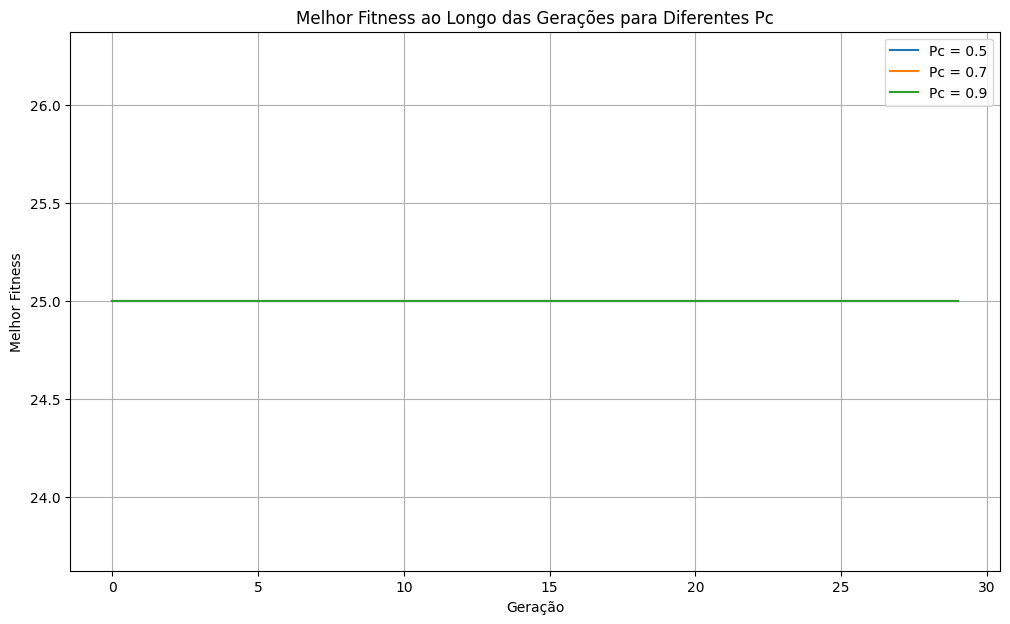


--- Melhor Fitness Final ---
Pc = 0.5: 25.00
Pc = 0.7: 25.00
Pc = 0.9: 25.00

--- Análise ---
A função de fitness f(x) = -(x-5)**2 + 25 tem um valor máximo de 25 quando x=5.
No nosso caso, x=5 em binário de 4 bits é [0, 1, 0, 1].
Observe como as diferentes probabilidades de crossover afetam a convergência do algoritmo em direção a este valor máximo.
Valores de Pc muito baixos podem resultar em pouca exploração, enquanto valores muito altos podem perturbar soluções promissoras.


In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

def crossover_1ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1)-1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_com_probabilidade(pai1, pai2, pc, crossover_func):
    if random.random() < pc:
        filho1, filho2 = crossover_func(pai1, pai2)
    else:
        filho1, filho2 = list(pai1), list(pai2)
    return filho1, filho2

def bin_to_int(individuo_bin):
    return int("".join(str(gene) for gene in individuo_bin), 2)

def fitness_function(individuo_bin):
    x = bin_to_int(individuo_bin)
    return -(x-5)**2 + 25

def gerar_populacao(tamanho_populacao, tamanho_individuo):
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = [random.randint(0, 1) for _ in range(tamanho_individuo)]
        populacao.append(individuo)
    return populacao

def selecao_roleta(populacao, fitness_valores):
    total_fitness = sum(fitness_valores)
    if total_fitness == 0:
        return random.choice(populacao)

    pick = random.uniform(0, total_fitness)
    current = 0
    for individuo, fitness in zip(populacao, fitness_valores):
        current += fitness
        if current > pick:
            return individuo
    return random.choice(populacao)

def algoritmo_genetico(tamanho_populacao, tamanho_individuo, num_geracoes, pc, crossover_func):
    populacao = gerar_populacao(tamanho_populacao, tamanho_individuo)
    historico_melhor_fitness = []

    for geracao in range(num_geracoes):
        fitness_valores = [fitness_function(ind) for ind in populacao]
        historico_melhor_fitness.append(max(fitness_valores))

        nova_populacao = []
        melhor_individuo_idx = np.argmax(fitness_valores)
        nova_populacao.append(populacao[melhor_individuo_idx])

        while len(nova_populacao) < tamanho_populacao:
            pai1 = selecao_roleta(populacao, fitness_valores)
            pai2 = selecao_roleta(populacao, fitness_valores)

            filho1, filho2 = crossover_com_probabilidade(pai1, pai2, pc, crossover_func)

            nova_populacao.append(filho1)
            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho2)

        populacao = nova_populacao

    return historico_melhor_fitness

tamanho_populacao = 20
tamanho_individuo = 4
num_geracoes = 30

probabilidades_crossover = [0.5, 0.7, 0.9]
resultados = {}

plt.figure(figsize=(12, 7))

for pc in probabilidades_crossover:
    print(f"Executando AG com Pc = {pc}")
    historico_fitness = algoritmo_genetico(tamanho_populacao, tamanho_individuo, num_geracoes, pc, crossover_1ponto)
    resultados[pc] = historico_fitness
    plt.plot(historico_fitness, label=f'Pc = {pc}')

plt.title('Melhor Fitness ao Longo das Gerações para Diferentes Pc')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Melhor Fitness Final ---")
for pc, hist in resultados.items():
    print(f"Pc = {pc}: {hist[-1]:.2f}")

### Exercício 9: Crossover híbrido


In [11]:
import random

def crossover_1ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1)-1)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_uniforme(pai1, pai2, taxa=0.5):
    filho1, filho2 = [], []
    for g1, g2 in zip(pai1, pai2):
        if random.random() < taxa:
            filho1.append(g1)
            filho2.append(g2)
        else:
            filho1.append(g2)
            filho2.append(g1)
    return filho1, filho2

def crossover_hibrido(pai1, pai2, prob_1ponto=0.6):
    if random.random() < prob_1ponto:
        print("Realizando Crossover de 1 Ponto...")
        return crossover_1ponto(pai1, pai2)
    else:
        print("Realizando Crossover Uniforme...")
        return crossover_uniforme(pai1, pai2)

pai1_bin = [1, 1, 0, 0, 1, 0, 0, 1]
pai2_bin = [0, 0, 1, 1, 0, 1, 1, 0]

print(f"Pais: {pai1_bin}, {pai2_bin}")

for i in range(5):
    print(f"\nTentativa {i+1}:")
    filho1, filho2 = crossover_hibrido(pai1_bin, pai2_bin, prob_1ponto=0.6)
    print(f"Filho1={filho1}, Filho2={filho2}")


Pais: [1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0]

Tentativa 1:
Realizando Crossover Uniforme...
Filho1=[0, 0, 1, 1, 0, 0, 0, 1], Filho2=[1, 1, 0, 0, 1, 1, 1, 0]

Tentativa 2:
Realizando Crossover Uniforme...
Filho1=[1, 0, 1, 0, 0, 0, 1, 0], Filho2=[0, 1, 0, 1, 1, 1, 0, 1]

Tentativa 3:
Realizando Crossover de 1 Ponto...
Filho1=[1, 1, 0, 0, 0, 1, 1, 0], Filho2=[0, 0, 1, 1, 1, 0, 0, 1]

Tentativa 4:
Realizando Crossover de 1 Ponto...
Filho1=[1, 1, 0, 0, 1, 0, 1, 0], Filho2=[0, 0, 1, 1, 0, 1, 0, 1]

Tentativa 5:
Realizando Crossover de 1 Ponto...
Filho1=[1, 1, 0, 1, 0, 1, 1, 0], Filho2=[0, 0, 1, 0, 1, 0, 0, 1]


### Exercício 10

O crossover de 2 pontos, parece ser melhor em cenários onde o posicionamento dos genes é importante, sendo importante e melhor para resolução de problemas. Ou seja quando existe uma alta probabilidade de que genes adjacentes ou em regiões específicas do cromossomo formem "blocos" que representam boas soluções parciais ou características desejáveis.


**Por que o crossover de 2 pontos pode ser melhor que o uniforme nesses casos?**

1.  **Preservação de Schemata**
2.  **Menos Disrupção:**

**Exemplo de problema:**

Considere um problema de **otimização de sequenciamento de tarefas em uma linha de produção (Job Shop Scheduling)**. Nesse problema, um cromossomo pode representar a ordem em que certas operações são executadas em diferentes máquinas. Os genes no cromossomo representariam as tarefas e sua posição indicaria a ordem.

*   **Cromossomo:** `[Tarefa_A, Tarefa_B, Tarefa_C, Tarefa_D, Tarefa_E, Tarefa_F]`

Suponha que a sequência `[Tarefa_C, Tarefa_D, Tarefa_E]` seja um "bloco" extremamente eficiente em uma parte da linha de produção (por exemplo, essas três tarefas devem ser executadas consecutivamente por uma máquina especializada para minimizar o tempo de setup ou maximizar o rendimento).

*   **Com Crossover de 2 pontos:** Se os pontos de corte forem escolhidos de forma a não "quebrar" esse segmento (ex: corte antes de C e depois de E), o bloco `[C, D, E]` será preservado e passado para o filho. Isso é benéfico, pois essa sequência é uma boa característica.

*   **Com Crossover Uniforme:** O crossover uniforme decidiria para cada posição se o gene vem do Pai 1 ou do Pai 2. Haveria uma alta probabilidade de que a sequência `[C, D, E]` seja desmembrada, com `C` vindo de um pai, `D` de outro, e `E` talvez do primeiro pai novamente. Isso destruiria o bloco eficiente, criando filhos com *fitness* potencialmente muito menor e dificultando a convergência para a solução ideal.
